In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#Check for null values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No null values


In [ ]:
data = data.rename({"R&D Spend":"RDS","Administration":"ADM","Marketing Spend":"MS"},axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Axes: >

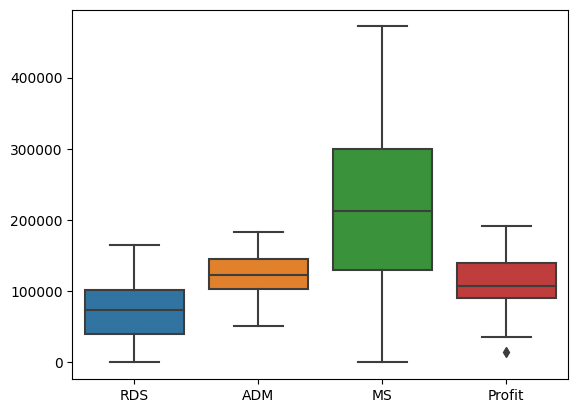

In [ ]:
#Outliers
sns.boxplot(data)


Profit column has outliers

In [ ]:
#Handling outliers
Q1 = np.percentile(data["Profit"],25)
Q3 = np.percentile(data["Profit"],75)
IQR = Q3 - Q1
Ub = Q3+(1.5*IQR)
Lb = Q1-(1.5*IQR)
data["Profit"][data["Profit"]>Ub] = Ub
data["Profit"][data["Profit"]<Lb] = Lb
sns.boxplot(data["Profit"])


In [ ]:
data[data.duplicated()] # No duplicated data

,RDS,ADM,MS,State,Profit


# **`Normalizing`**

In [ ]:
# Drop 'State' column, since it is non numrical
df = data
df.drop(['State'], axis=1, inplace=True)
df.head()

,RDS,ADM,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# **Correlation analysis**

In [ ]:
df.corr()

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Figure size 800x800 with 0 Axes>

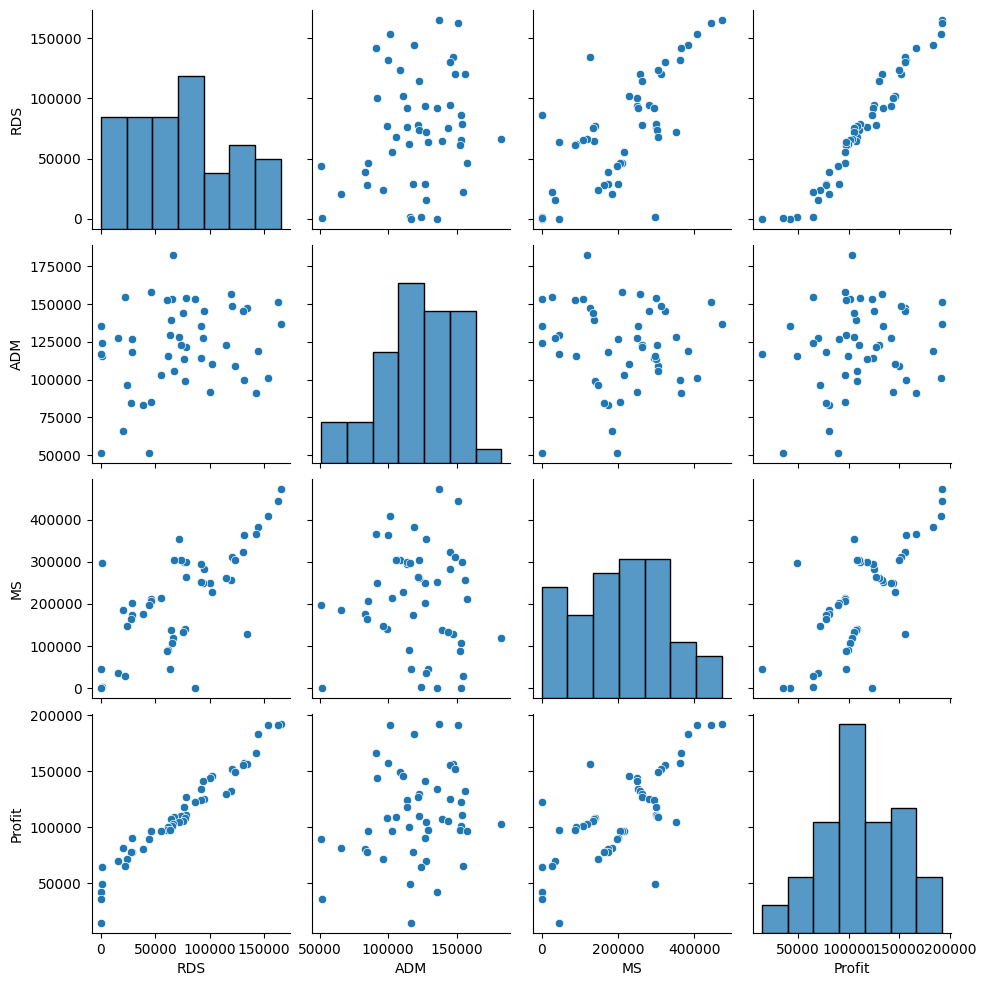

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df)

<Axes: >

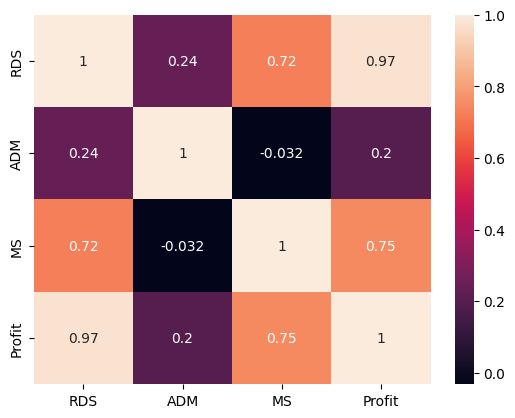

In [ ]:
sns.heatmap(df.corr(),annot=True)

# **Model Building**

In [ ]:
df.columns

Index(['RDS', 'ADM', 'MS', 'Profit'], dtype='object')

In [ ]:
model = smf.ols("Profit~RDS+ADM+MS",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        02:23:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADM & MS are insignificant



# **Model Testing**

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADM' and 'MS'
# Also find their pvalues

In [ ]:
model_adm = smf.ols("Profit~ADM",data=df).fit()
model_adm.pvalues

Intercept    0.003824
ADM          0.162217
dtype: float64

Adm has high probabilty value than significant value that is not impacting Profit

In [ ]:
model_ms = smf.ols("Profit~MS",data=df).fit()
model_ms.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

*  Ms has low probabilty value than significant value that is impacting Profit.
*  MS has significant pvalue






In [ ]:
model_adm_ms = smf.ols("Profit~ADM+MS",data=df).fit()
model_adm_ms.pvalues

Intercept    2.589341e-01
ADM          1.729198e-02
MS           9.727245e-11
dtype: float64

Indipendent varaibles have significant pvalues

# **Model Validation :-**

1.  Collinearty check
2.  Residual analysis




**Collinearty check**

In [ ]:
#1.using VIF value check collinearity

In [ ]:
#VIF value of ADM
m1 = smf.ols('ADM~RDS+MS',data=df).fit()
rs_adm = m1.rsquared
vif_adm = (1/(1-rs_adm))
vif_adm

#VIF value of MS
m2 = smf.ols('MS~ADM+RDS',data=df).fit()
rs_ms = m2.rsquared
vif_ms = (1/(1-rs_ms))
vif_ms

#VIF value of RDS
m3 = smf.ols('RDS~ADM+MS',data=df).fit()
rs_rds = m3.rsquared
vif_rds = (1/(1-rs_rds))
vif_rds

#putting all dataframe values in dataframe format
d1={'Variables':['RDS','ADM','MS'],'Vif':[vif_rds,vif_adm,vif_ms]}
vif = pd.DataFrame(d1)
vif

,Variables,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


None variable has VIF>*5*, No Collinearity, so consider all varaibles in Regression equation

**Residual Analysis**

In [ ]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

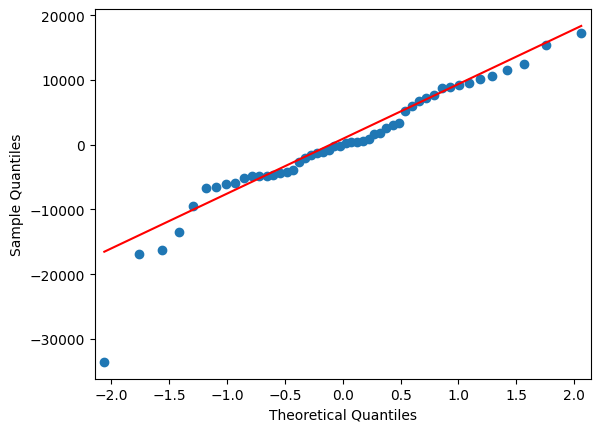

In [ ]:
qqplot = sm.qqplot(model.resid,line="q")

In [ ]:
#standardized values for both residuals and fitted values

def standardize1(v):
  eqn = (v - v.mean())/v.std()
  return eqn


Text(0, 0.5, 'standardized residual values')

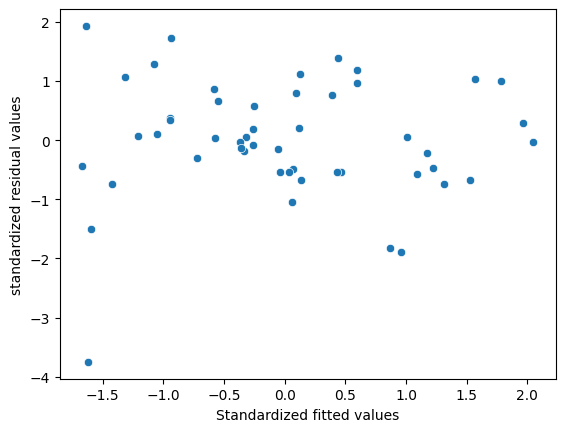

In [ ]:
sns.scatterplot(x = standardize1(model.fittedvalues),y = standardize1(model.resid) )
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")

## **Test of errors (Residual Vs Regressor)**

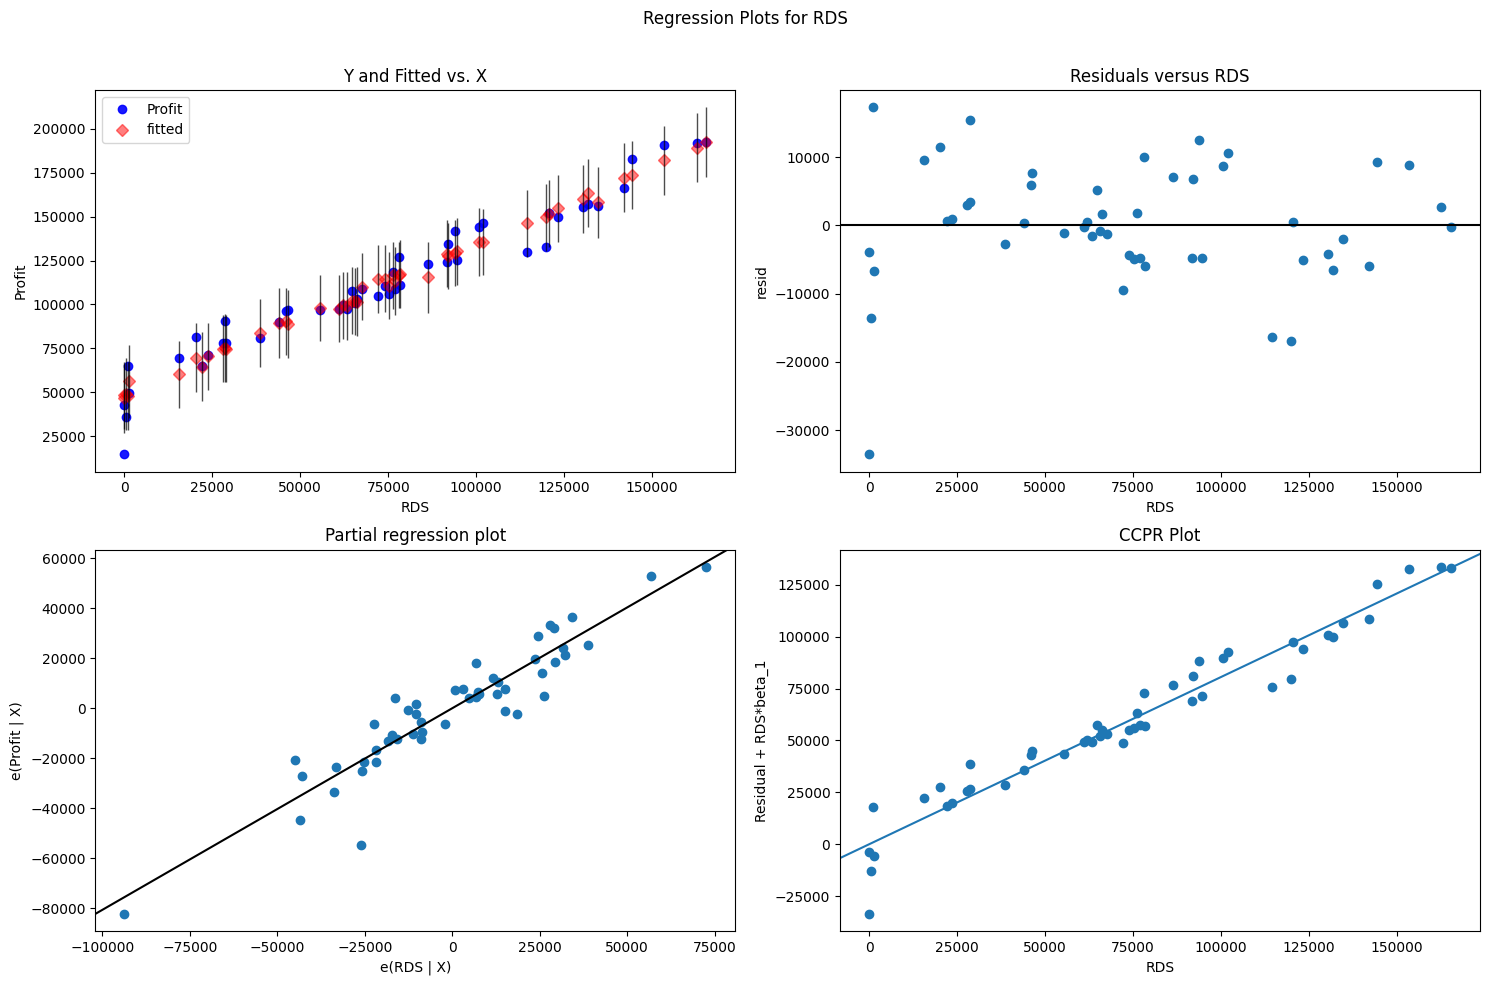

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()


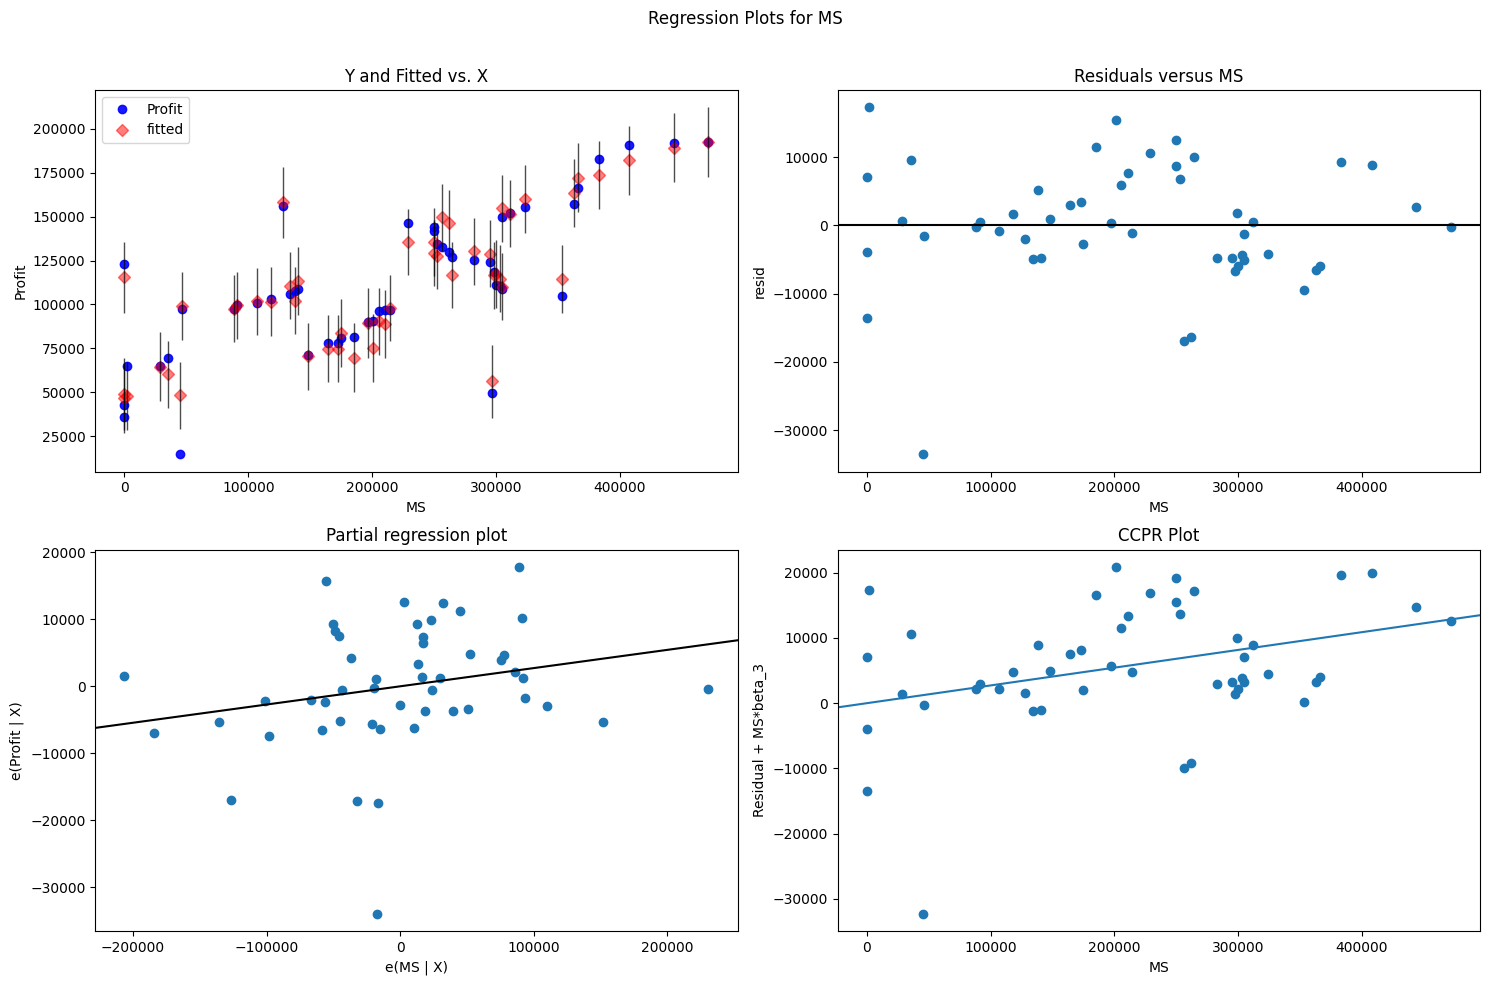

In [ ]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()


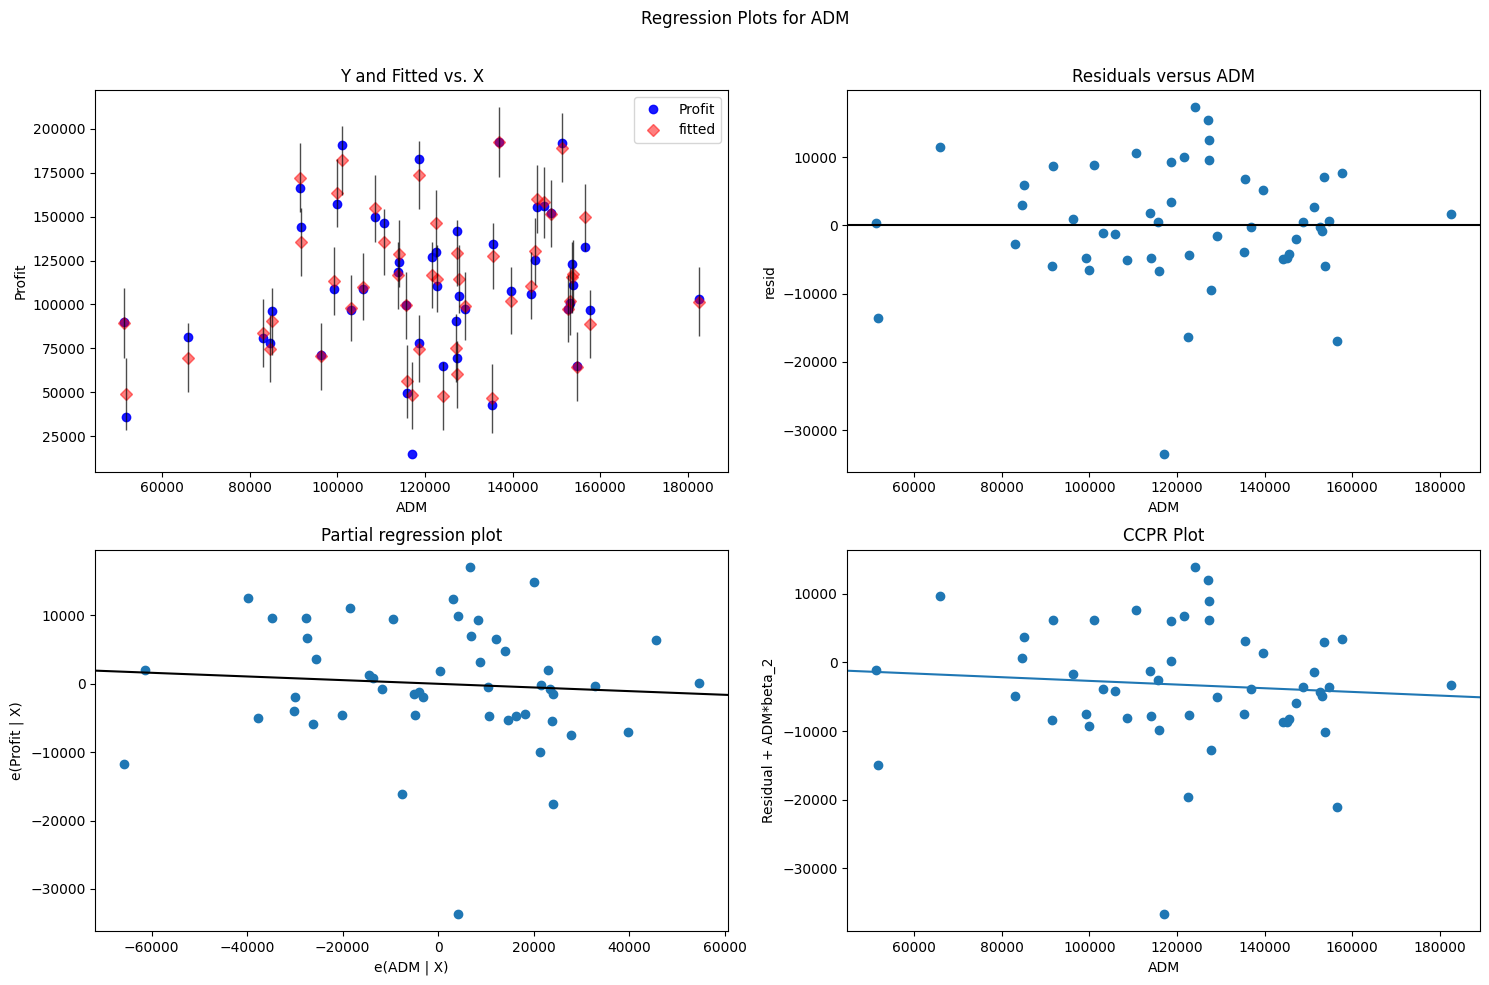

In [ ]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"ADM",fig=fig)
plt.show()


# **Model Deletion Diagnostics (checking Outliers or Influencers)**
Two Techniques :
1. Cook's Distance &
2. Leverage value

In [ ]:
#Cook distance
mfv = model.get_influence()
(cv,_)=mfv.cooks_distance
mfv.cooks_distance

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

<StemContainer object of 3 artists>

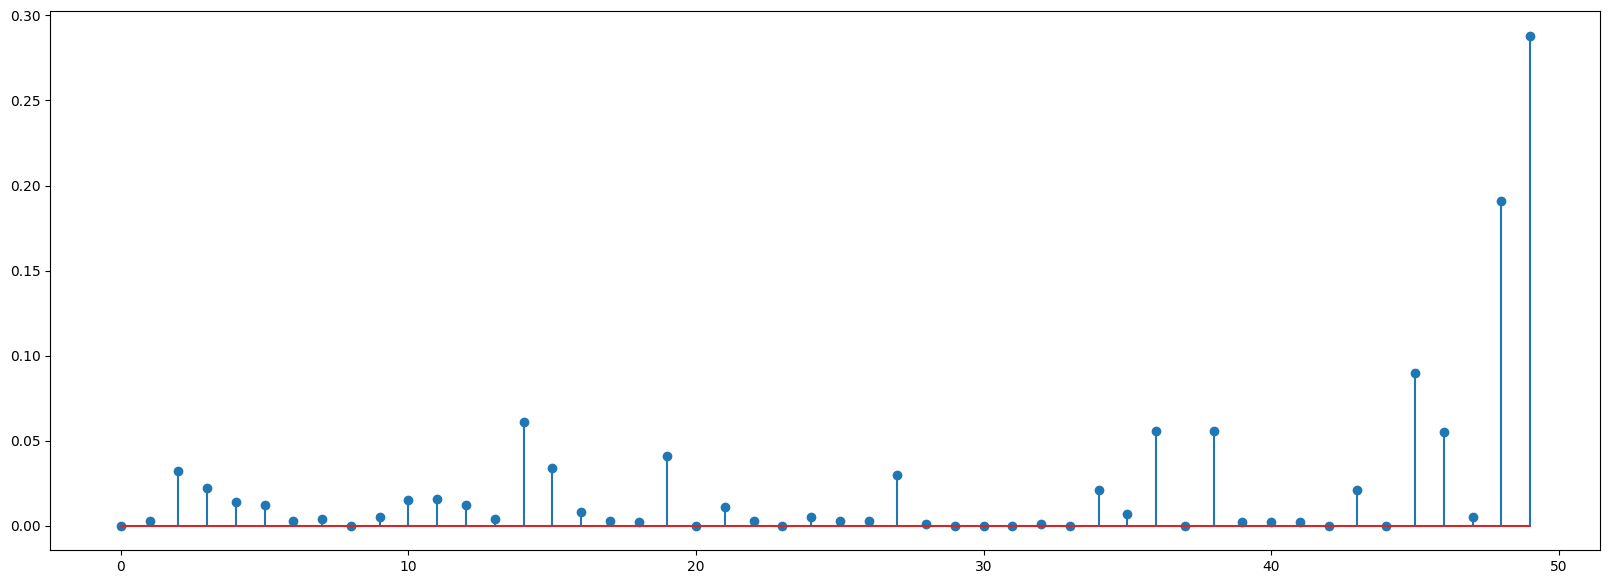

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df)),np.round(cv,3))

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(cv) , np.max(cv)


(49, 0.2880822927543272)

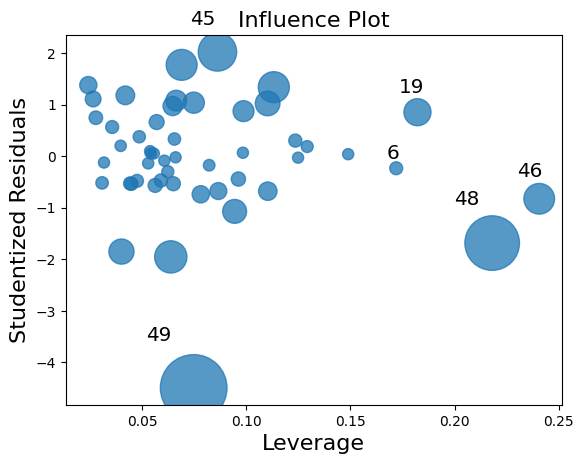

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
df.shape

(50, 4)

In [ ]:
#leverage value
k = df.shape[1] #no. features
n = df.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [ ]:
df[49:]

,RDS,ADM,MS,Profit
49,0.0,116983.8,45173.06,14681.4


In [ ]:
df[df.index.isin([49])]

,RDS,ADM,MS,Profit
49,0.0,116983.8,45173.06,14681.4


Significant differences in value of RDS & Profit in 49th record so it is a outlier drop it






In [ ]:
df1 = df
df1.drop(df1.index[49],axis=0,inplace=True)
df1 = df1.reset_index()

In [ ]:
df1.drop("index",axis=1,inplace=True)
df1.shape

(49, 4)

# **Rebuilding model**

In [ ]:
model1 = smf.ols("Profit~RDS+ADM+MS",data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           8.85e-32
Time:                        02:23:28   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mfv = model1.get_influence()
(cv,_)=mfv.cooks_distance
cv

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

<StemContainer object of 3 artists>

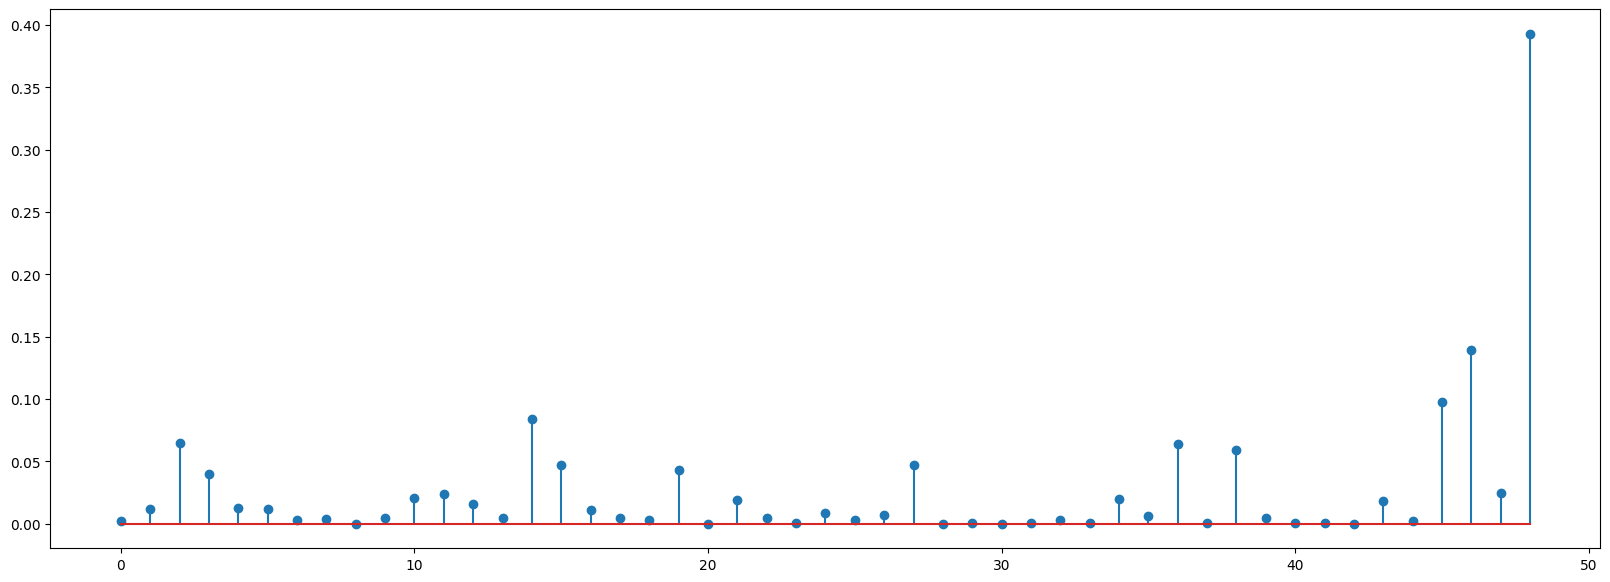

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df)),np.round(cv,3))

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(cv) , np.max(cv)

(48, 0.39274420556321443)

In [ ]:
#leverage value
k = df1.shape[1] #no. features
n = df1.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.30612244897959184

Outliers are present

In [ ]:
#DROP 48th element
df1.drop(df1.index[48],axis=0,inplace=True)

In [ ]:

df1 = df1.reset_index()
df1.drop("index",axis=1,inplace=True)

In [ ]:
df1.shape

(48, 4)

# **Rebuilding Model**

In [ ]:
model2 = smf.ols("Profit~RDS+ADM+MS",data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.03e-31
Time:                        02:23:29   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADM           -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mfv = model2.get_influence()
(cv,_)=mfv.cooks_distance
cv

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

<StemContainer object of 3 artists>

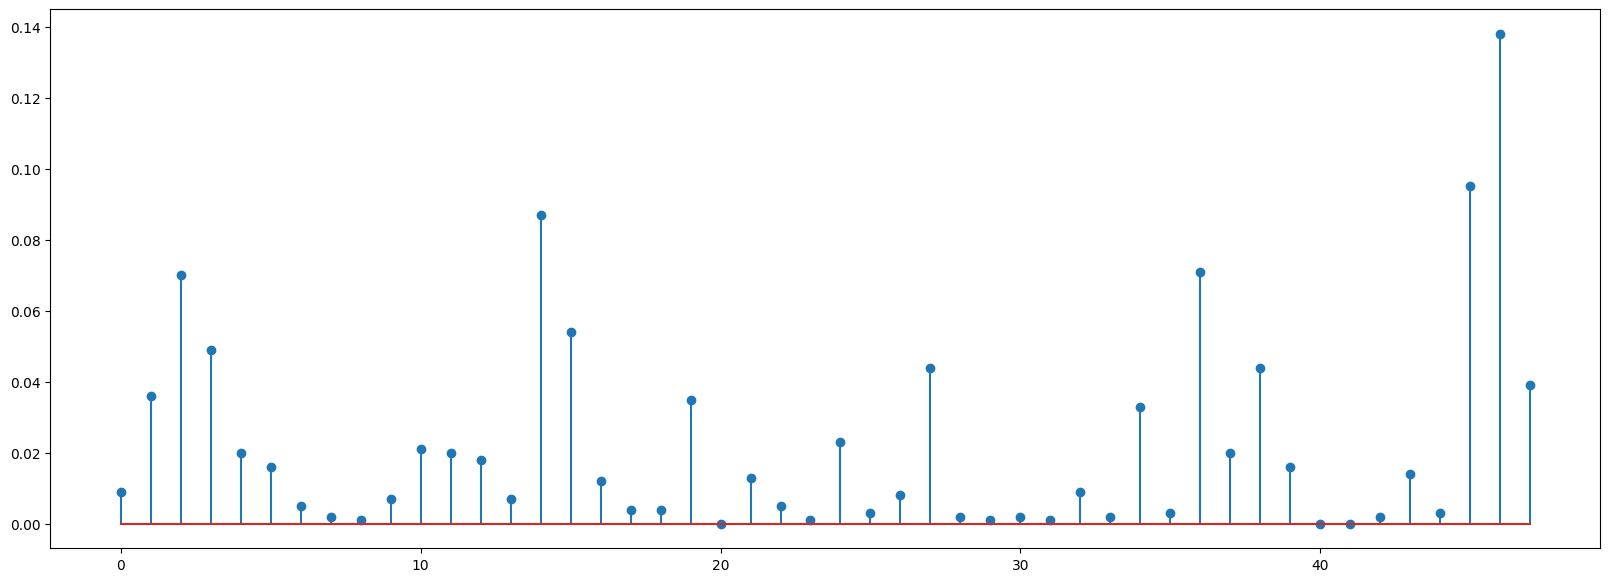

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(cv) , np.max(cv)

(46, 0.13829133994334297)

In [ ]:
#leverage value
k = df1.shape[1] #no. features
n = df1.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.3125

No outliers

# **Applying sqrt transformation**

In [ ]:
model3 = smf.ols("Profit~np.sqrt(RDS)+(np.sqrt(ADM))+(np.sqrt(MS))",data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           8.14e-21
Time:                        02:23:29   Log-Likelihood:                -520.01
No. Observations:                  48   AIC:                             1048.
Df Residuals:                      44   BIC:                             1056.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.128e+04   1.89e+04      1.125      0.267   -1.69e+04    5.94e+04
np.sqrt(RDS)   343.4786     27.239     12.610      0.000     288.582     398.375
np.sqrt(ADM)    -8.0606     51.400     -0.157      0.876    -111.651      95.529
np.sqrt(MS)     17.5111     16.152      1.084      0.284     -15.040      50.062
==============================================================================
Omnibus:                        8.191   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.806
Skew:                           0.979   Prob(JB):                       0.0202
Kurtosis:                       3.257   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Decrease the accuracy

# **Applying square transformation**

In [ ]:
model4 = smf.ols("Profit~np.square(RDS)+(np.square(ADM))+(np.square(MS))",data=df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.61e-22
Time:                        02:23:29   Log-Likelihood:                -516.25
No. Observations:                  48   AIC:                             1041.
Df Residuals:                      44   BIC:                             1048.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.135e+04   5286.607     15.389      0.000    7.07e+04     9.2e+04
np.square(RDS)  4.747e-06   3.98e-07     11.935      0.000    3.95e-06    5.55e-06
np.square(ADM) -1.559e-07   2.86e-07     -0.545      0.588   -7.32e-07     4.2e-07
np.square(MS)  -5.589e-09   5.53e-08     -0.101      0.920   -1.17e-07    1.06e-07
==============================================================================
Omnibus:                        7.702   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.846
Skew:                          -0.735   Prob(JB):                       0.0326
Kurtosis:                       4.124   Cond. No.                     2.55e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Accuracy decreased as compared with model2

In [ ]:

d2={'Model Name':['model','model1','model2','model3','model4'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared, model4.rsquared]}
table=pd.DataFrame(d2)
table

,Model Name,Rsquared
0,model,0.950746
1,model1,0.961316
2,model2,0.962677
3,model3,0.886561
4,model4,0.903025


**Inference : model2 is having highest R-squared value**

# **Model Predictions**

In [ ]:
# let the data for prediction is
pred_data=pd.DataFrame({'RDS':70000,"ADM":90000,"MS":140000},index=[0])
pred_data

,RDS,ADM,MS
0,70000,90000,140000


In [ ]:
# Manual Prediction of Price
model2.predict(pred_data)

0    111027.02823
dtype: float64